In [1]:
# Classification problem
# titanic dataset, predicting the passenger survival
# probability of survival;  Logistic Regression

# Steps:  1: data preprocessing: cleaning 
# 2: Explore (EDA) 
# 3: Build the Predictive Model ; 
# 4: Test the model 

In [70]:
# import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Dataframe

ttrain = pd.read_csv('d:/datasets/train.csv')

In [72]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# EDA 
# missing data

ttrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

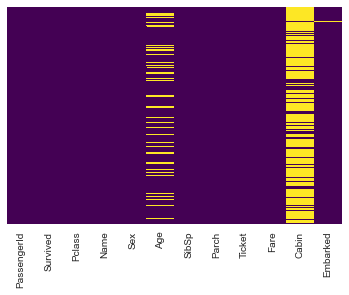

In [74]:
sns.heatmap(ttrain.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [75]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# SNS style;  whitegrid
sns.set_style('whitegrid')

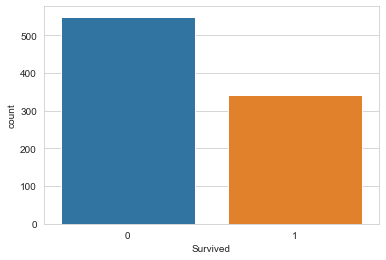

In [77]:
# count ; who survived and who didn't
sns.countplot(x='Survived',data=ttrain)
plt.show()

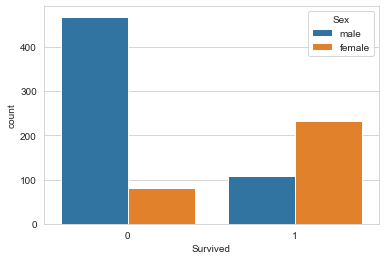

In [78]:
# Genderwise survival
sns.countplot(x='Survived',hue='Sex',data=ttrain)
plt.show()

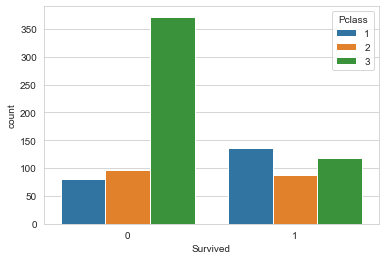

In [79]:
# Classwise -- survival
sns.countplot(x='Survived',hue='Pclass',data=ttrain)
plt.show()

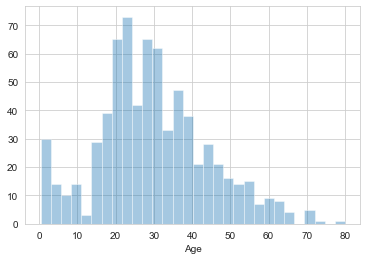

In [80]:
# Age;  distribution
sns.distplot(ttrain['Age'].dropna(),kde=False,bins=30)
plt.show()

In [81]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


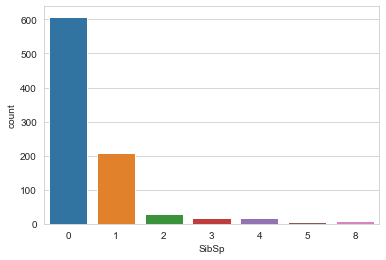

In [82]:
# SibSp = Siblings/Spouce

sns.countplot(x='SibSp',data=ttrain)

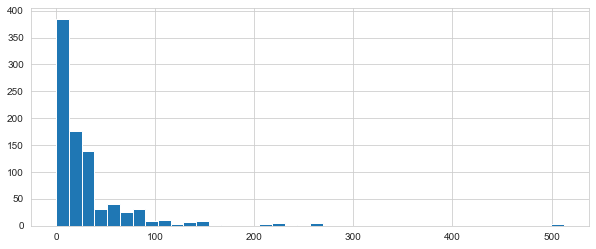

In [83]:
# Explore the fare variable
ttrain['Fare'].hist(bins=40,figsize=(10,4))

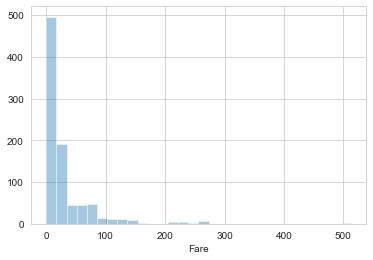

In [84]:
sns.distplot(ttrain['Fare'],kde=False,bins=30)

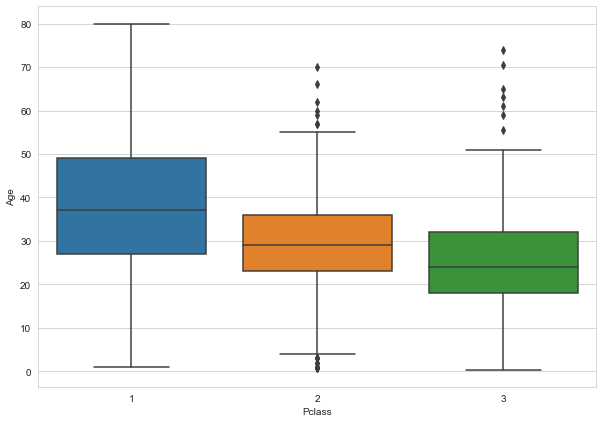

In [85]:
# Handling the missing data;  age

# filling in the missing age data; Imputation - stats technique

# based on median age of passenger class

# get the median age of passengers classwise

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=ttrain)

In [86]:
# A function to impute age

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):  # if the age is null
        if Pclass == 1: # check for the P class
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [87]:
# Use the above function to impute the age

ttrain['Age'] = ttrain[['Age','Pclass']].apply(impute_age,axis=1)

In [88]:
ttrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

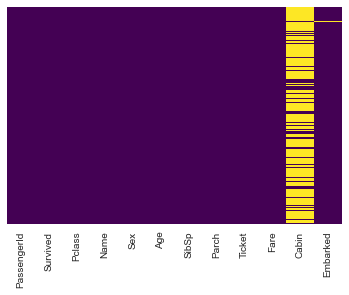

In [89]:
sns.heatmap(ttrain.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [90]:
# impute Embarked variable

ttrain[ttrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [91]:
ttrain[ttrain['Pclass'] == 1]['Embarked'].count()

214

In [92]:
ttrain.groupby(['Pclass','Embarked'])['Pclass'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Pclass, dtype: int64

In [93]:
ttrain[ttrain['Pclass'] == 1]['Embarked'].mode()

0    S
dtype: object

In [94]:
ttrain['Embarked'] = ttrain['Embarked'].fillna('S')

In [95]:
ttrain[ttrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [96]:
ttrain[(ttrain['PassengerId'] == 62) | (ttrain['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [97]:
# Drop the cabin variable

ttrain.drop('Cabin',axis=1,inplace=True)

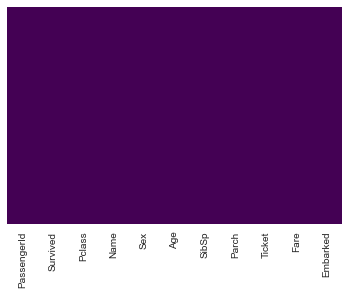

In [98]:
sns.heatmap(ttrain.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [99]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [100]:
# dealing with Categorical Variables
# Sex(gender), Embarked  --> dummy/indicator variables
# ex. male = 1 female = 0

In [101]:
# Sex; gender

pd.get_dummies(ttrain['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [102]:
pd.get_dummies(ttrain['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [103]:
Gender = pd.get_dummies(ttrain['Sex'],drop_first=True)

In [104]:
# next ;  embark categorical variable 

ttrain['Embarked'].unique()
# S = Southampton ; C = Cherbourg Q = Queenstown,  

array(['S', 'C', 'Q'], dtype=object)

In [105]:
pd.get_dummies(ttrain['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [106]:
embark = pd.get_dummies(ttrain['Embarked'],drop_first=True)

In [107]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [108]:
# drop the columns;  not required ...

ttrain.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [109]:
ttrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [110]:
# Add the Gender and embark ; dummy variables

# Concatenate

ttrain = pd.concat([ttrain,Gender,embark],axis=1)

In [113]:
ttrain

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [114]:
# define X and y variables

X = ttrain.drop("Survived",axis=1)
y = ttrain["Survived"]

# Split the data into train and test set

In [116]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)


In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   male    891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [94]:
y # target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [118]:
# building the model;  Logistic Regression

# import the algorithm

from sklearn.linear_model import LogisticRegression


In [119]:
# Initialize the model

PSurvival_model = LogisticRegression()

In [120]:
# Train the model
PSurvival_model.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
predictions = PSurvival_model.predict(X_test) # Y-hat

In [ ]:
# Actual Y 
print (y_test)

In [122]:
# Model Evaluation
# Classification report and Confusion Matrix

# import
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))




              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [129]:
print ("total Test Records:",len(y_test))

correct = 88+55
wrong = 11+25

print ("Correct:",correct)
print ("wrong:",wrong)
print (correct+wrong)

total Test Records: 179
Correct: 143
wrong: 36
179


In [123]:
# confusion matrix
print(confusion_matrix(y_test,predictions))

[[88 11]
 [25 55]]


In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test['Age'].isnull().sum()

86

In [56]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [57]:
test['Age'].isnull().sum()

0

In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [59]:
test['Fare'].iloc[152] = 7.8292

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8292
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [61]:
test.drop('Cabin',axis=1,inplace=True)
# Sex; gender
pd.get_dummies(test['Sex'])
pd.get_dummies(test['Sex'],drop_first=True)
Gender = pd.get_dummies(test['Sex'],drop_first=True)

pd.get_dummies(test['Embarked'])
embark = pd.get_dummies(test['Embarked'],drop_first=True)

# drop the columns;  not required ...

test.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis=1,inplace=True)
# Concatenate

test = pd.concat([test,Gender,embark],axis=1)


In [62]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [63]:
# define X and y variables for test dataset

X = test
#y = test["Survived"]

In [76]:
#X = X.drop('Fare',axis=1)

In [78]:
X

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1
...,...,...,...,...,...,...,...
413,3,24.0,0,0,1,0,1
414,1,39.0,0,0,0,0,0
415,3,38.5,0,0,1,0,1
416,3,24.0,0,0,1,0,1


In [64]:
predictions = PSurvival_model.predict(X)  # Y-hat

In [64]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [65]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
#  Evaludate Model Performance/accuracy 

# Generate Classification report & Confusion Matrix

# import
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
# Classification Report
print(classification_report())

In [67]:
len(ttrain)

891

In [68]:
len(test)

418

In [69]:
891 + 418

1309